In [193]:
import seaborn as sns
import pandas as pd

In [194]:
trainv2 = pd.read_csv('train_V2.csv')

In [151]:
trainv2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [152]:
trainv2.describe().columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [153]:
trainv2.describe(include=['O']).columns

Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object')

In [154]:
##전투 데미지,킬(헤드샷) 어시스트 기절
##이동 걸은 거리 탑승 거리
##생존 치유/부스트 리바이스

In [155]:
##전투 damageDealt,kills(headshotKills),assists,DBNOs
##이동 walkDistance,rideDistance
##생존 heals/boosts revives

In [195]:
trainv2[trainv2.isnull().any(axis=1)]
trainv2 =trainv2.drop(index=2744604) #결측치 제거

In [196]:
cond=trainv2.matchType.isin(['squad-fpp','duo-fpp','squad','solo-fpp','duo','solo'])#캐쥬얼,사용자 지정 모드를 제외시킨다
trainv2 = trainv2[cond]
len(trainv2)

4411698

In [197]:
df = trainv2[['damageDealt',
              'kills',
              'headshotKills',
              'assists',
              'DBNOs',
              'walkDistance',
              'rideDistance',
              'heals',
              'boosts',
              'revives',
              'matchType',
              'groupId',
              'matchId',
              'killPlace',
              'weaponsAcquired',
              'winPlacePerc']]

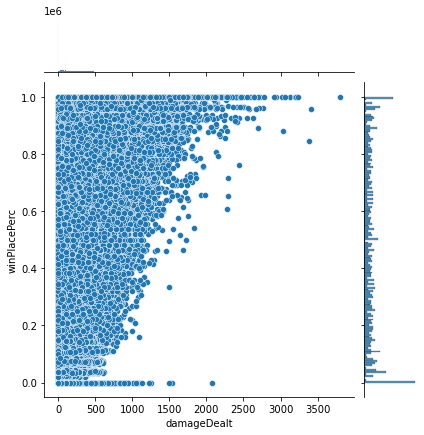

In [159]:
sns.jointplot(data=df,x='damageDealt',y='winPlacePerc')

In [160]:
df[df.damageDealt >2000].sort_values(by='winPlacePerc')

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
3100028,2079.0,0,0,0,0,0.0,0.0000,11,0,0,solo,1fd1bf6dc8b047,3076c4618c6638,4,3,0.0000
3383167,2276.0,8,3,2,15,2060.0,2765.0000,1,3,0,squad,c5732a8f5e6821,fe07ae91124140,2,6,0.6071
4236023,2290.0,7,5,0,10,2502.0,3322.0000,2,2,0,squad,4b2059c135958a,236a2b1197e069,4,4,0.6538
385983,2297.0,18,11,0,18,3329.0,2024.0000,1,1,1,squad,fb890c9fd68a3d,cb9f9a8e4422c2,1,3,0.7143
1756064,2438.0,15,12,0,21,2712.0,0.0671,2,5,0,squad,b29760c31a988e,1e2f7f78f678e9,1,5,0.7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962572,2258.0,10,7,2,20,4001.0,0.0000,2,2,1,squad,88341f73c0b55a,07e579c0dc14ff,1,5,1.0000
1973233,2008.0,19,13,1,11,4181.0,0.0000,0,2,0,squad,6ce296c8d5a422,637bbc3c7b23ad,1,4,1.0000
2011263,2008.0,14,2,1,15,2922.0,4768.0000,8,5,1,squad-fpp,af1c91fac0d857,462242bbf17944,1,4,1.0000
1699036,2583.0,18,17,2,22,3726.0,2382.0000,4,7,2,squad,f6170ab22a7b34,95ebe0c3506179,1,6,1.0000


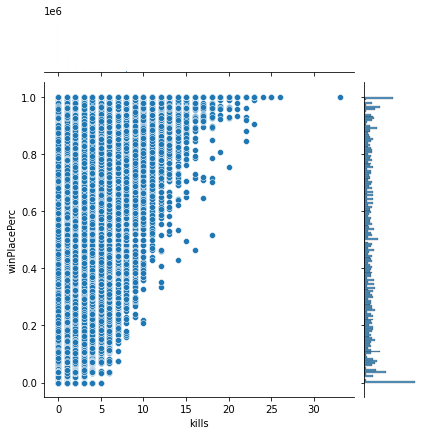

In [161]:
sns.jointplot(data=df,x='kills',y='winPlacePerc')

In [162]:
df[(df.kills==0)&(df.winPlacePerc==1.0)].matchId.value_counts()#kills 이 0인데 승률이 1.0인 경우 13231

4cf35bf31e3c37    8
de76092cb4f310    7
328cab4a890ba4    6
2183f03b8dd456    6
3a37f49685d09b    6
                 ..
d633761ef12d27    1
f80d10d97bf8b7    1
da27d1433c1757    1
fe3cc0b029c15a    1
b68a152e9ed994    1
Name: matchId, Length: 13231, dtype: int64

In [163]:
df[(df.kills==0)&(df.winPlacePerc==1.0)&(df.matchType=='solo')].sort_values(by='killPlace',ascending=False)

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
3121594,0.0,0,0,0,0,4271.00,2100.0,0,3,0,solo,ac2bd8b8e66ac8,c608582a5a22d6,42,6,1.0
1773603,0.0,0,0,0,0,2444.00,0.0,0,4,0,solo,a3a737dd0bb636,d9bd439ef03963,33,4,1.0
1624028,198.0,0,0,0,0,0.00,0.0,2,1,0,solo,965f34293ca8ab,4cf35bf31e3c37,8,4,1.0
1676668,297.0,0,0,0,0,0.00,0.0,0,0,0,solo,f48db2194bead5,de76092cb4f310,7,5,1.0
1918523,99.0,0,0,0,0,0.00,0.0,2,0,0,solo,965f34293ca8ab,4cf35bf31e3c37,7,4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338130,0.0,0,0,0,0,70.72,1788.0,0,0,0,solo,c5801014137697,e2e09525c109b3,1,1,1.0
1339472,121.3,0,0,0,0,0.00,0.0,0,0,0,solo,55c0cd88a8cbc7,58055181940065,1,3,1.0
1346464,43.0,0,0,0,0,37.46,4059.0,0,1,0,solo,cad362c8f8d2ab,6b40410be908eb,1,6,1.0
2901475,0.0,0,0,0,0,4.44,0.0,0,0,0,solo,0982d1c2a51038,1758d4bc223d07,1,0,1.0


In [209]:
df[(df.kills==0)&(df.winPlacePerc==1.0)&(df.matchType=='solo-fpp')].sort_values(by='killPlace',ascending=False)

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
219312,0.00,0,0,0,0,2162.0,0.0,0,6,0,solo-fpp,92293b265ca1f7,c8cd99c3c148b4,46,4,1.0
1517391,207.90,0,0,1,0,1820.0,4698.0,1,3,0,solo-fpp,a944a0d5d0c49c,c044bb02f16da6,44,5,1.0
3919301,42.57,0,0,1,0,1038.0,6654.0,9,7,0,solo-fpp,df91ee8d4260d9,d881cff13ef931,43,7,1.0
4073632,162.50,0,0,1,0,2520.0,0.0,7,6,0,solo-fpp,89d1f7f3979ce1,47bf06e8fc98a7,43,4,1.0
3217834,98.32,0,0,1,0,1831.0,0.0,0,3,0,solo-fpp,5af16160b847b4,236bdbecbc13e6,42,7,1.0


In [221]:
df[df.matchId=='236bdbecbc13e6'].sort_values(by='winPlacePerc',ascending=False).head(20)

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
3217834,98.32,0,0,1,0,1831.0,0.0,0,3,0,solo-fpp,5af16160b847b4,236bdbecbc13e6,42,7,1.0000
4386260,725.00,7,1,0,0,2913.0,0.0,0,5,0,solo-fpp,b671de07ee86dd,236bdbecbc13e6,2,8,0.9895
969133,1044.00,11,4,0,0,3304.0,0.0,7,6,0,solo-fpp,c9022eeab13bce,236bdbecbc13e6,1,4,0.9789
1684242,400.20,2,0,0,0,3049.0,3104.0,1,5,0,solo-fpp,3c100b6cfb080c,236bdbecbc13e6,11,7,0.9684
970087,67.05,0,0,0,0,3805.0,0.0,9,8,0,solo-fpp,51af357313f4d3,236bdbecbc13e6,43,5,0.9579
1039620,127.40,1,0,0,0,2781.0,0.0,0,2,0,solo-fpp,35ec9c2886dfc6,236bdbecbc13e6,18,4,0.9474
770836,100.00,1,0,0,0,3288.0,0.0,5,4,0,solo-fpp,2bafacdd40541f,236bdbecbc13e6,19,3,0.9368
2729314,298.00,3,0,0,0,2183.0,589.4,6,2,0,solo-fpp,6a450dc98fce0b,236bdbecbc13e6,9,7,0.9263
4425377,169.50,1,0,0,0,719.4,0.0,0,0,0,solo-fpp,f77a257744510d,236bdbecbc13e6,20,3,0.9158
664135,0.00,0,0,0,0,2940.0,0.0,0,1,0,solo-fpp,53138d072038ed,236bdbecbc13e6,44,3,0.9053


In [164]:
df[(df.matchId=='44fa051734f50f')&(df.groupId=='80203270d8bf67')].sort_values(by='killPlace',ascending=False)

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
4028360,192.2,1,0,1,1,2288.0,0.0,0,0,0,duo,80203270d8bf67,44fa051734f50f,23,5,0.9565
801335,745.3,7,3,3,4,3029.0,0.0,1,4,0,duo,80203270d8bf67,44fa051734f50f,1,2,0.9565


In [165]:
df[(df.matchId=='44fa051734f50f')&(df.groupId=='6ad3351953b514')].sort_values(by='killPlace',ascending=False)

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
1289,126.8,0,0,2,0,1458.0,0.0,1,2,0,duo,6ad3351953b514,44fa051734f50f,44,3,1.0
4438163,327.0,5,0,0,2,1536.0,0.0,1,1,1,duo,6ad3351953b514,44fa051734f50f,5,5,1.0


In [166]:
df[df.matchId=='c608582a5a22d6'].sort_values(by='winPlacePerc',ascending=True).tail(20)

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
2599946,0.00,0,0,0,0,1160.0,740.6000,2,4,0,solo,c778776deba355,c608582a5a22d6,49,5,0.8021
3489720,304.00,3,1,0,0,1131.0,7502.0000,0,4,0,solo,9b22f8f0734aab,c608582a5a22d6,9,5,0.8125
1057736,0.00,0,0,0,0,1602.0,4562.0000,3,1,0,solo,33ced84a0d93ea,c608582a5a22d6,48,4,0.8229
2984314,0.00,0,0,0,0,4176.0,0.0000,15,4,0,solo,8787d935c8fccd,c608582a5a22d6,47,6,0.8333
803788,34.30,0,0,0,0,2997.0,0.0000,1,0,0,solo,907bf08cf67db1,c608582a5a22d6,46,4,0.8438
1447265,79.38,0,0,0,0,1038.0,9771.0000,1,1,0,solo,d67c8d75ef29ae,c608582a5a22d6,45,6,0.8542
911135,0.00,0,0,0,0,1078.0,8807.0000,0,0,0,solo,900557ee0ef2fa,c608582a5a22d6,44,2,0.8646
1965038,0.00,0,0,0,0,2072.0,4705.0000,0,0,0,solo,81cd19f926f873,c608582a5a22d6,43,8,0.8750
1526838,91.16,1,0,0,0,1836.0,0.0000,1,0,0,solo,97040a55b01bda,c608582a5a22d6,20,3,0.8854
1905595,334.50,3,0,0,0,986.8,3743.0000,10,6,0,solo,fba49f44d9736b,c608582a5a22d6,8,6,0.8958


In [167]:
cond=df.groupId.value_counts()>4
show = cond[cond]
show=list(cond.index)
show

['b8275198faa03b',
 '128b07271aa012',
 '7385e5fe214021',
 'a3bc33847d2304',
 '6cf057e17002ff',
 'e8d2b3018f9d69',
 'cc0f7324bf3b34',
 '566ed94d7d1fd2',
 '59b747efaf412d',
 'ce8c1468dafa0a',
 '6a292d4d1a0207',
 '3f20b49669a981',
 '475538899822a6',
 '872e2b63dedcd9',
 '72145e7a9939f5',
 'af8923aa727499',
 'be589a52d14364',
 '3b88c850a9719c',
 '2eab78352cf7fc',
 'eaa6e72633dd45',
 '5ca2b0bc03d8ea',
 'ff4ba5c55012ff',
 '81a9cb7d53f761',
 '82f4d187747dd8',
 '1146732e6a3ea9',
 'fd54d1964049af',
 'baa1a7e7526d40',
 'cf1574f8a4818b',
 '32c38547f59dbc',
 '326cb3b4876b7d',
 '97b8132ec60b59',
 '144f98129b9d57',
 'f75f33e36adb48',
 '3d7cfe6b97d387',
 '0f1c0291af456b',
 '2fbe755c70927d',
 'f08ffe0f8bafa9',
 'df461591c93989',
 'a692296a25fcd7',
 '5f47cf67f824e0',
 '86969083b74a74',
 '2fee3fff7b23cd',
 'cf70861f70d951',
 '2df51da1810c9b',
 '6d4362962ea033',
 '1fdaad41403fd5',
 'a632bfb7813bb9',
 '6bd24138a5a062',
 '6b049b5b23654a',
 '823fb080a04aa6',
 '1c0e4fa8c55884',
 '41e97ff81274b7',
 'b5592a6382

In [168]:
df[df.groupby('groupId')['groupId'].transform('size')>4].sort_values(by='groupId')

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
88768,0.00,0,0,0,0,2271.0,417.4,0,2,0,squad-fpp,00016e873e252c,277e86c6ae740d,44,8,0.6364
315746,0.00,0,0,0,0,2331.0,415.5,0,1,0,squad-fpp,00016e873e252c,277e86c6ae740d,45,4,0.6364
684725,0.00,0,0,0,0,2254.0,526.6,0,2,0,squad-fpp,00016e873e252c,277e86c6ae740d,43,4,0.6364
1032068,0.00,0,0,0,0,3021.0,0.0,1,0,0,squad-fpp,00016e873e252c,277e86c6ae740d,41,5,0.6364
3702381,27.40,0,0,0,0,3246.0,0.0,0,0,0,squad-fpp,00016e873e252c,277e86c6ae740d,42,3,0.6364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596796,100.00,0,0,0,1,1420.0,0.0,0,0,0,squad-fpp,ffff681ebe74a8,b7f77b5181bb44,58,2,0.3571
1328373,41.53,0,0,0,0,1309.0,0.0,0,0,0,squad-fpp,ffff681ebe74a8,b7f77b5181bb44,57,5,0.3571
2492460,0.00,0,0,0,0,1357.0,0.0,0,0,0,squad-fpp,ffff681ebe74a8,b7f77b5181bb44,59,6,0.3571
899917,85.72,0,0,1,0,1394.0,0.0,0,0,0,squad-fpp,ffff681ebe74a8,b7f77b5181bb44,60,3,0.3571


In [169]:
df[df.matchId=='bac52627a12114'].sort_values(by='groupId',ascending=False).head(30)#95명

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
81773,251.50,2,0,1,1,2622.000,0.0,0,5,0,squad-fpp,ff045d0a4e35ea,bac52627a12114,18,6,0.7407
680028,50.55,1,0,0,1,2862.000,0.0,1,1,0,squad-fpp,ff045d0a4e35ea,bac52627a12114,29,2,0.7407
2954850,100.00,0,0,0,1,26.120,0.0,0,0,0,squad-fpp,ff045d0a4e35ea,bac52627a12114,50,1,0.7407
717792,167.40,1,0,1,1,2988.000,208.3,3,4,0,squad-fpp,edabd116b81e7f,bac52627a12114,25,9,0.9259
2722337,80.73,0,0,0,0,177.300,0.0,0,0,0,squad-fpp,edabd116b81e7f,bac52627a12114,45,5,0.9259
2347470,369.00,3,1,0,3,3302.000,0.0,1,8,4,squad-fpp,edabd116b81e7f,bac52627a12114,6,4,0.9259
1130331,172.30,1,1,0,2,3798.000,0.0,6,4,0,squad-fpp,edabd116b81e7f,bac52627a12114,24,4,0.9259
1723211,0.00,0,0,0,0,1125.000,1355.0,0,0,0,squad-fpp,e910f4a08b6bef,bac52627a12114,55,4,0.6296
1071454,0.00,0,0,0,0,1098.000,1056.0,1,2,0,squad-fpp,e910f4a08b6bef,bac52627a12114,52,4,0.6296
138273,156.70,0,0,0,1,1708.000,1051.0,0,2,1,squad-fpp,e910f4a08b6bef,bac52627a12114,54,4,0.6296


In [170]:
df[df.groupby('groupId')['groupId'].transform('size')<=4]

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
0,0.00,0,0,0,0,244.80,0.0000,0,0,0,squad-fpp,4d4b580de459be,a10357fd1a4a91,60,1,0.4444
1,91.47,0,0,0,0,1434.00,0.0045,0,0,0,squad-fpp,684d5656442f9e,aeb375fc57110c,57,5,0.6400
2,68.00,0,0,1,0,161.80,0.0000,0,0,0,duo,6a4a42c3245a74,110163d8bb94ae,47,2,0.7755
3,32.90,0,0,0,0,202.70,0.0000,0,0,0,squad-fpp,a930a9c79cd721,f1f1f4ef412d7e,75,3,0.1667
4,100.00,1,0,0,0,49.75,0.0000,0,0,0,solo-fpp,de04010b3458dd,6dc8ff871e21e6,45,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446959,22.68,0,0,0,0,40.25,0.0000,0,0,0,solo-fpp,ac3f1b4a56e5ad,2f3b1af94739b3,89,1,0.0842
4446962,44.15,0,0,0,0,81.70,0.0000,0,1,0,solo,408cdb5c46b2ac,ee854b837376d9,69,6,0.2935
4446963,59.06,0,0,0,0,788.70,0.0000,0,0,0,squad-fpp,e26ac84bdf7cef,6d0cd12784f1ab,66,4,0.4815
4446964,180.40,2,1,0,1,2748.00,0.0000,2,4,2,squad-fpp,c2223f35411394,c9c701d0ad758a,11,8,0.8000


In [171]:
3685616 +726082 


4411698

In [103]:
##데이터를 학습시킨다 지도 학습 x   (학습)   y 
##학습이 잘되게 하기 위해서 타겟값에 영향(상관계수,featureImpotance등)을 미치는 컬럼을 포함시킨다
##반대로 말하면 영향을 미치는 컬럼을 제외시키면 모델학습이 잘 안될수도 있다

##현업에서는 중요한 컬럼보다는 과정을 더 중요하게 여긴다 성능보다는 논리적으로 기준을 잡는다

##그룹아이디는 한매치당 같은 팀원을 표시해주는 데이터이지만 최대팀원 4이상의 데이터들이 있다
##df[df.groupby('groupId')['groupId'].transform('size')>4].sort_values(by='groupId') 726082 rows

#michaelapers님이 말하길 : 게임에서 연결이 끊기기 때문에 발생하는 현상입니다. 
#연결 해제가 발생하면 여러 그룹의 플레이어가 API의 데이터베이스에 동일한 최종 배치를 가진 것으로 저장되기 때문입니다.
#그렇기에 우리는 groupId를 확실히 함께한 팀이 아니라 동일한 최종 순위를 가진 선수라고 생각해야 합니다.

##데이터에는 솔로 듀오 스쿼드의 경기 기록이 포함되어 있으며 듀오 스쿼드의 경우
##팀원이 1명이라도 살아남아 등수가 높아지면 팀원 전부 같은 타겟값을 가지게 된다 
##위의 오류로 인해 등수가 실제로 낮아야 하지만 타겟값이 상향성을 가질수 있어 높은 등수로 기록되는 데이터가 존재하고
##실제로 정상적인 데이터의 경우도 팀원의 등수가 낮지만 다른 팀원의 그룹아이디 기준으로 같은 타겟값을 가지게 된다 
##오류와 실제 데이터를 구별할수 있는 구별점을 찾을수 없으며 따라서 수정할수도 없다 판단되어 진다
##df[df.matchId=='bac52627a12114'].sort_values(by='groupId',ascending=False).head(30)#95명

##오류인 데이터의 양이 많고 그룹아이디는 오류이지만 나머지 컬럼들의 값은 정상적이라 판단되어 삭제 할수도 없다
##수정도 삭제도 할수 없지만 타겟값이 고정되어 있기 때문에 전체적인 모델학습이 안될꺼라 판단되어 진다
##그룹아이디를 구별할수 있는 컬럼을 찾지 못했기에 임의로 그룹아이디값을 수정한다고 해도 타겟값을 변경할수 없기 때문에
##모델학습에 적합한 데이터셋이 아니라 생각되어 의욕이 많이 떨어진다('killPlace이후 연타')


##이어서 등수를 쉽게 올릴수 있는 스쿼드 듀오 솔로 기준으로 게임이 쉽다 생각 할수 있으며
##실제로 사람들이 어려운 게임보다 쉬운게임을 원하는 경향으로 게임수가 스쿼드 듀오 솔로 순으로 난이도에 대한 순서가 있고
##난이도가 쉬울수록 등수가 오를 가능성이 있기 때문에 matchType은 오디널 인코딩을 선택하였다

##실제로 배틀그라운드는 생존fps 게임으로 0킬로 우승한다는게 불가능한 게임은 아니지만
##데이터중 0킬이지만 등수와 승률이 높은 경향이 있는거 같아 솔로기준으로 데이터를 살펴보았다
##df[df.matchId=='01aead02bb8901'].sort_values(by='killPlace',ascending=False)

##위 경기는 솔로경기이며 최대인원이 100명 중 참여인원이 20명인 데이터이다
#그룹아이디는 2개로 5등부터 20등까지 1등에서 4등까지 그룹아이디가 2개로 나눠져있으며 편히 1등과 2등으로 지칭한다
#2등그룹은 무기획득을 최대18회 까지 한데이터가 있지만 walkDistance가 0이며 무기획득을 하려면 케릭터가 움직여야 하니
#이상 데이터라 생각이 되고
#전체적으로 데미지를 입혔지만 킬을 한 유저가 한명도 없으며 종합결과 정상적인 match가 아니라고 판단되어 진다
#df[(df.kills==0)&(df.winPlacePerc==1.0)].matchId.value_counts()#kills 이 0인데 승률이 1.0인 경우 13231
#듀오와 스쿼드의 데이터상 킬수가 0이여도 승률이 1.0이 될 가능성이 있으며 그럴수 없는 솔로의 경기만 따로 확인하였다

##솔로경기중 킬이 0이지만 승률이 1.0인 데이터가 938건이며 matchId기준 375건이다
#df[(df.kills==0)&(df.winPlacePerc==1.0)&(df.matchType=='solo')].loc[:,'matchId'].value_counts()#936건 matchId기준 375건

##킬이0이면서 승률이 1.0이 있는 경기이지만 정상적으로 보이는경우 (elo 시스템 때문인듯하다 이상치제거를 할수없다)
#df[df.matchId=='c608582a5a22d6'].sort_values(by='winPlacePerc',ascending=True).tail(20)

#수작업으로 모든 matchId를 확인하는 방법밖에 없는듯 하다
#matchId 기준 모든 kills 데이터가 0인 경기만 따로 뽑아내는 반복문을 돌려야되나...??


In [223]:
df[df.matchId=='c608582a5a22d6'].sort_values(by='winPlacePerc',ascending=True).tail(20)

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
2599946,0.00,0,0,0,0,1160.0,740.6000,2,4,0,solo,c778776deba355,c608582a5a22d6,49,5,0.8021
3489720,304.00,3,1,0,0,1131.0,7502.0000,0,4,0,solo,9b22f8f0734aab,c608582a5a22d6,9,5,0.8125
1057736,0.00,0,0,0,0,1602.0,4562.0000,3,1,0,solo,33ced84a0d93ea,c608582a5a22d6,48,4,0.8229
2984314,0.00,0,0,0,0,4176.0,0.0000,15,4,0,solo,8787d935c8fccd,c608582a5a22d6,47,6,0.8333
803788,34.30,0,0,0,0,2997.0,0.0000,1,0,0,solo,907bf08cf67db1,c608582a5a22d6,46,4,0.8438
1447265,79.38,0,0,0,0,1038.0,9771.0000,1,1,0,solo,d67c8d75ef29ae,c608582a5a22d6,45,6,0.8542
911135,0.00,0,0,0,0,1078.0,8807.0000,0,0,0,solo,900557ee0ef2fa,c608582a5a22d6,44,2,0.8646
1965038,0.00,0,0,0,0,2072.0,4705.0000,0,0,0,solo,81cd19f926f873,c608582a5a22d6,43,8,0.8750
1526838,91.16,1,0,0,0,1836.0,0.0000,1,0,0,solo,97040a55b01bda,c608582a5a22d6,20,3,0.8854
1905595,334.50,3,0,0,0,986.8,3743.0000,10,6,0,solo,fba49f44d9736b,c608582a5a22d6,8,6,0.8958


In [207]:
df[df.matchId=='c608582a5a22d6'].sort_values(by='winPlacePerc',ascending=True).tail(20)

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
2599946,0.00,0,0,0,0,1160.0,740.6000,2,4,0,solo,c778776deba355,c608582a5a22d6,49,5,0.8021
3489720,304.00,3,1,0,0,1131.0,7502.0000,0,4,0,solo,9b22f8f0734aab,c608582a5a22d6,9,5,0.8125
1057736,0.00,0,0,0,0,1602.0,4562.0000,3,1,0,solo,33ced84a0d93ea,c608582a5a22d6,48,4,0.8229
2984314,0.00,0,0,0,0,4176.0,0.0000,15,4,0,solo,8787d935c8fccd,c608582a5a22d6,47,6,0.8333
803788,34.30,0,0,0,0,2997.0,0.0000,1,0,0,solo,907bf08cf67db1,c608582a5a22d6,46,4,0.8438
1447265,79.38,0,0,0,0,1038.0,9771.0000,1,1,0,solo,d67c8d75ef29ae,c608582a5a22d6,45,6,0.8542
911135,0.00,0,0,0,0,1078.0,8807.0000,0,0,0,solo,900557ee0ef2fa,c608582a5a22d6,44,2,0.8646
1965038,0.00,0,0,0,0,2072.0,4705.0000,0,0,0,solo,81cd19f926f873,c608582a5a22d6,43,8,0.8750
1526838,91.16,1,0,0,0,1836.0,0.0000,1,0,0,solo,97040a55b01bda,c608582a5a22d6,20,3,0.8854
1905595,334.50,3,0,0,0,986.8,3743.0000,10,6,0,solo,fba49f44d9736b,c608582a5a22d6,8,6,0.8958


In [174]:
df[(df.kills==0)&(df.winPlacePerc==1.0)&(df.matchType=='solo')].loc[:,'matchId'].value_counts()

4cf35bf31e3c37    8
de76092cb4f310    7
2183f03b8dd456    6
328cab4a890ba4    6
3a37f49685d09b    6
                 ..
3076c4618c6638    1
f251af778b4477    1
5ddd684bf067f8    1
d2058adac51ba5    1
26e8c86945dfda    1
Name: matchId, Length: 375, dtype: int64

In [199]:
matchList=df[(df.kills==0)&(df.winPlacePerc==1.0)&(df.matchType=='solo')].loc[:,'matchId'].value_counts().index.to_list()

In [192]:
!pip install tqdm

from tqdm import trange, notebook            # show progress-bar

In [203]:
checkList=[]
for i in notebook.tqdm(matchList):
    check = df[df.matchId==i].kills>0
    if check.any() == False :
        checkList.append(i)
    else:
        print('True :',i)
print(checkList)

  0%|          | 0/375 [00:00<?, ?it/s]

True : c608582a5a22d6
True : d9bd439ef03963
['4cf35bf31e3c37', 'de76092cb4f310', '2183f03b8dd456', '328cab4a890ba4', '3a37f49685d09b', 'f37dc144d476dd', 'd043dc27463023', 'd0668068cfa369', '4a41a495d0dc58', 'f6fa9246145367', '3eeed62f1f57cd', '3b81750d1d242c', 'db85c12e4f1aed', '445a37e3465fec', '832accc40ad0e1', 'a5a5aaacfb89f6', '4894744b98b9fe', '42f14b3483d7b2', '818e099d16ef82', '781df428bd8747', '08d0e0a1ee08ef', 'c8821ecfb3d512', 'cf0871f0c0ead4', 'cb36fab737f9fd', '17536a9f1481b5', '01ee716430b23a', '1cd95f7e8a4483', '5f3ab3fd0d7929', '17032b757d715f', '8f3dbddfbb6509', '5ea653b5906506', '7372ce198d37fa', '0195fbe135716e', '6bc2ef50be3bbc', 'ec4390c66fa083', 'f7bfbfab040691', 'd3c266e66d9f19', '686f42d386e50a', '7494245d9d3c49', '89e409394ae00f', '02d17b99f39a48', '9e875bc57d2bd9', 'd079035fd0d627', '748e25cb99d3a3', '89e72b8477832e', '797dd54dccf1fe', '5d23eaf1175cc6', '2d8b832901ede7', '95e928b5f66028', '1758d4bc223d07', 'cf0cb51c829eb5', 'f3c5fa51aacb95', '0c8d6af7398d27', '

In [208]:
df[df.matchId=='de76092cb4f310'].sort_values(by='killPlace')

,damageDealt,kills,headshotKills,assists,DBNOs,walkDistance,rideDistance,heals,boosts,revives,matchType,groupId,matchId,killPlace,weaponsAcquired,winPlacePerc
2797453,127.00,0,0,0,0,0.0,0.0,0,0,0,solo,f48db2194bead5,de76092cb4f310,1,2,1.0
2228855,83.46,0,0,0,0,0.0,0.0,0,0,0,solo,f48db2194bead5,de76092cb4f310,2,35,1.0
1194922,108.00,0,0,0,0,1442.0,139.2,0,0,0,solo,f48db2194bead5,de76092cb4f310,3,7,1.0
235265,0.00,0,0,0,0,0.0,0.0,1,2,0,solo,f48db2194bead5,de76092cb4f310,4,4,1.0
366266,0.00,0,0,0,0,0.0,0.0,0,0,0,solo,f48db2194bead5,de76092cb4f310,5,9,1.0
1820925,0.00,0,0,0,0,0.0,0.0,0,1,0,solo,f48db2194bead5,de76092cb4f310,6,4,1.0
1676668,297.00,0,0,0,0,0.0,0.0,0,0,0,solo,f48db2194bead5,de76092cb4f310,7,5,1.0
580057,0.00,0,0,0,0,0.0,0.0,0,0,0,solo,3304fbdd49f01d,de76092cb4f310,8,3,0.0
3860310,99.00,0,0,0,0,0.0,0.0,0,0,0,solo,3304fbdd49f01d,de76092cb4f310,9,4,0.0
3593436,0.00,0,0,0,0,0.0,0.0,0,0,0,solo,3304fbdd49f01d,de76092cb4f310,10,2,0.0


False